The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan.[1]

The inputs are as follows

X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

X2=the house age (unit: year)

X3=the distance to the nearest MRT station (unit: meter)

X4=the number of convenience stores in the living circle on foot (integer)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

The output is as follows

Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [10]:
# import image module 
from IPython.display import Image 
  
# get the image 
Image(url="variables table.PNG", width=3000, height=3000) 

The variables table is taken from UCI Machine Learning Repository [1]

Download and read the "Real estate valuation data set.xlsx" dataset. 
You can find the description of the features and targets on th  UCI repository website.

Let us import all the necessary libraries such as pandas [2], numpy [3], matplotlib [4] seaborn [5] and sklearn [6] for our analysis before-hand and add others whenever necessary to read the data and visualize it.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold

In [10]:
data = pd.read_excel("Real estate valuation data set.xlsx")

In [11]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [13]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [14]:
data.duplicated().sum()

0

As we see, there are no missing values and duplicates in the dataset. Also, all features are continuous in nature.

Let us rename the columns for better readability.

In [16]:
data.rename(
    columns={
        "X1 transaction date": "Transaction_Date", 
        "X2 house age": "House_Age", 
        "X3 distance to the nearest MRT station": "Distance",
        "X4 number of convenience stores": "Num_NearBy_Stores",
        "X5 latitude": "Latitude",
        "X6 longitude": "Longitude",
        "Y house price of unit area": "Target_House_Price",
    },
    inplace = True
)

In [17]:
data.columns

Index(['No', 'Transaction_Date', 'House_Age', 'Distance', 'Num_NearBy_Stores',
       'Latitude', 'Longitude', 'Target_House_Price'],
      dtype='object')

We drop the 'No' feature as that might not help for our analysis. Also, we see that the transaction date feature has a different way of representing the year and month.

In [19]:
data = data.drop(['No'],axis=1)

In [20]:
data.columns

Index(['Transaction_Date', 'House_Age', 'Distance', 'Num_NearBy_Stores',
       'Latitude', 'Longitude', 'Target_House_Price'],
      dtype='object')

In [21]:
data.corr()

,Transaction_Date,House_Age,Distance,Num_NearBy_Stores,Latitude,Longitude,Target_House_Price
Transaction_Date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
House_Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Num_NearBy_Stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Target_House_Price,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [22]:
data.corr()['Target_House_Price'].sort_values(ascending=False)

Target_House_Price    1.000000
Num_NearBy_Stores     0.571005
Latitude              0.546307
Longitude             0.523287
Transaction_Date      0.087529
House_Age            -0.210567
Distance             -0.673613
Name: Target_House_Price, dtype: float64

Number of nearby stores, latitude and longitude are positively correlated with the target variable; Distance to the nearest MRT station and house age are neatively correlated to the target feature.

Among them, we see that the feature 'house age' seems to have the highest negative correlation to the target feature. 
When the house age increases, i.e. if the house is old, its price is lower compared to the other houses.

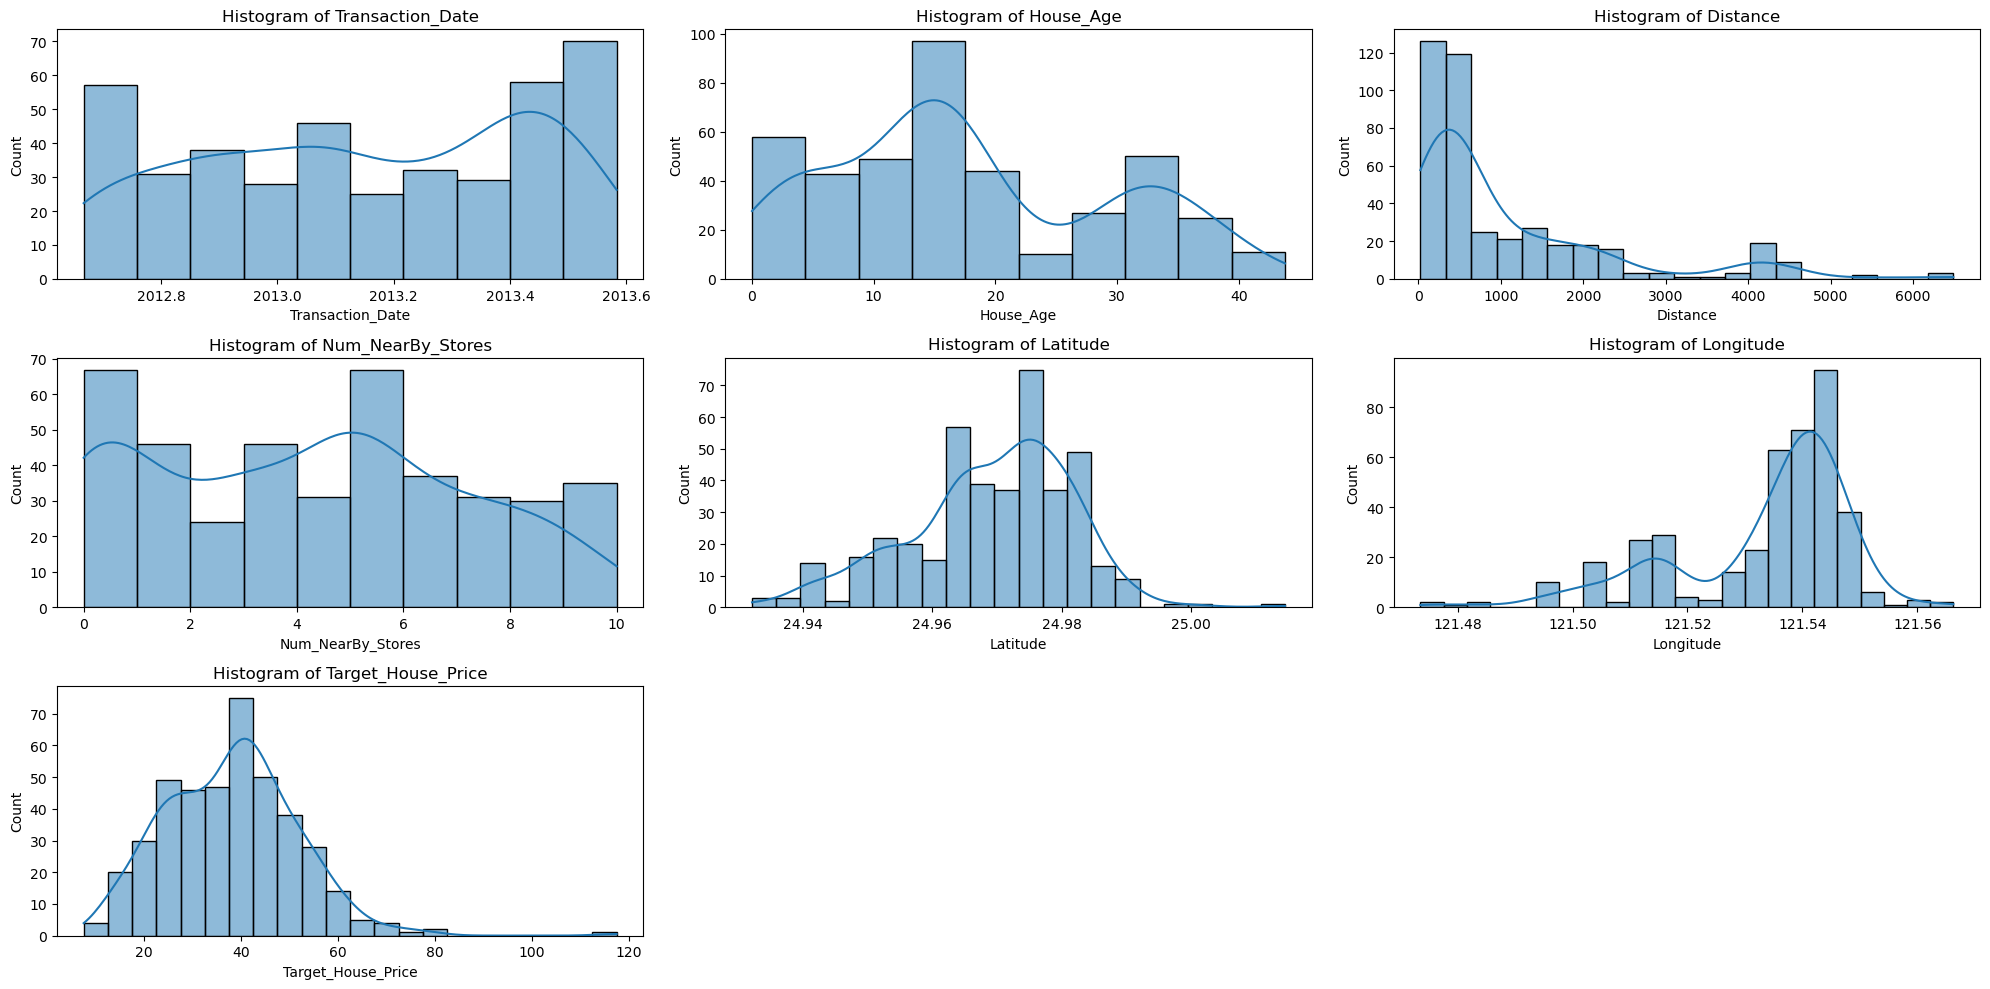

In [24]:
#Histograms for variables
plt.figure(figsize=(20, 10))
for i, var in enumerate(data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

Even from the histogram, it is evident that there are outliers in the dataset for most of the variables.

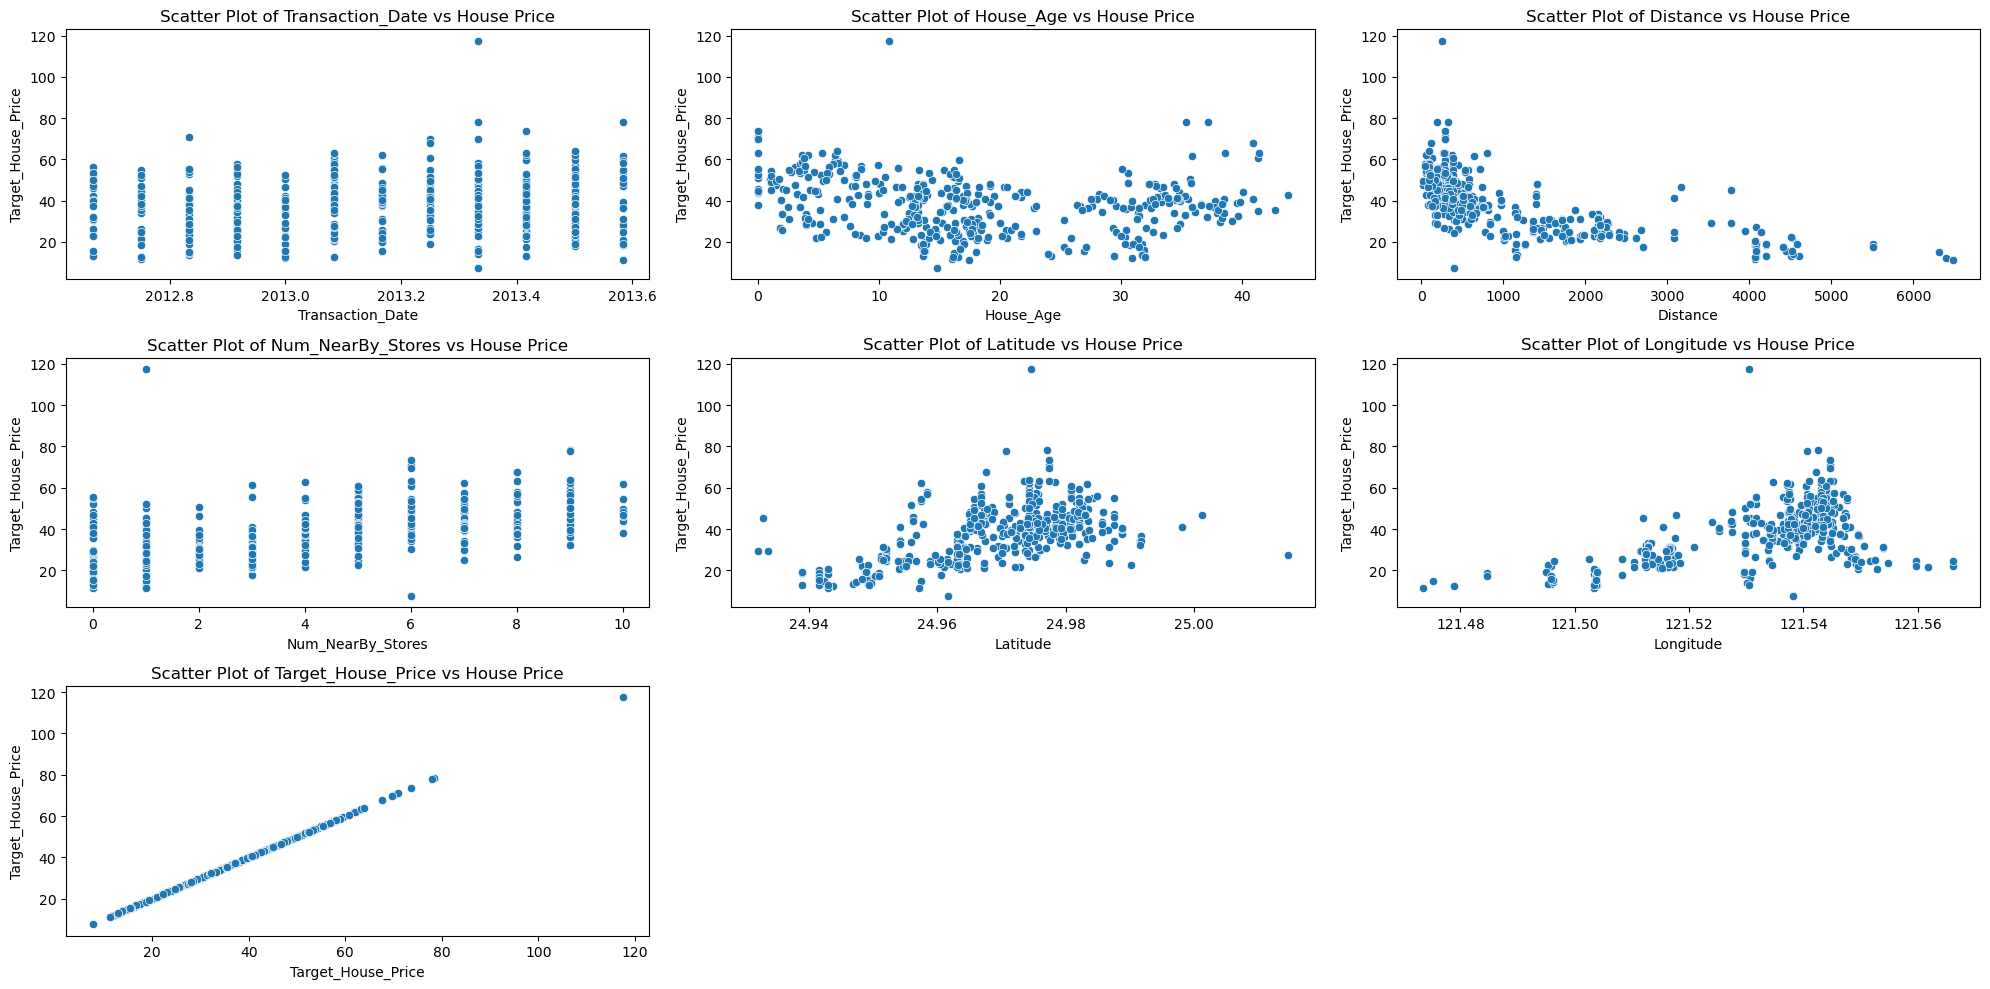

In [25]:
# Scatter plots for variables against the target variable
plt.figure(figsize=(20, 10))
for i, var in enumerate(data.columns):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=data[var], y=data['Target_House_Price'])
    plt.title(f'Scatter Plot of {var} vs House Price')
plt.tight_layout()
plt.show()

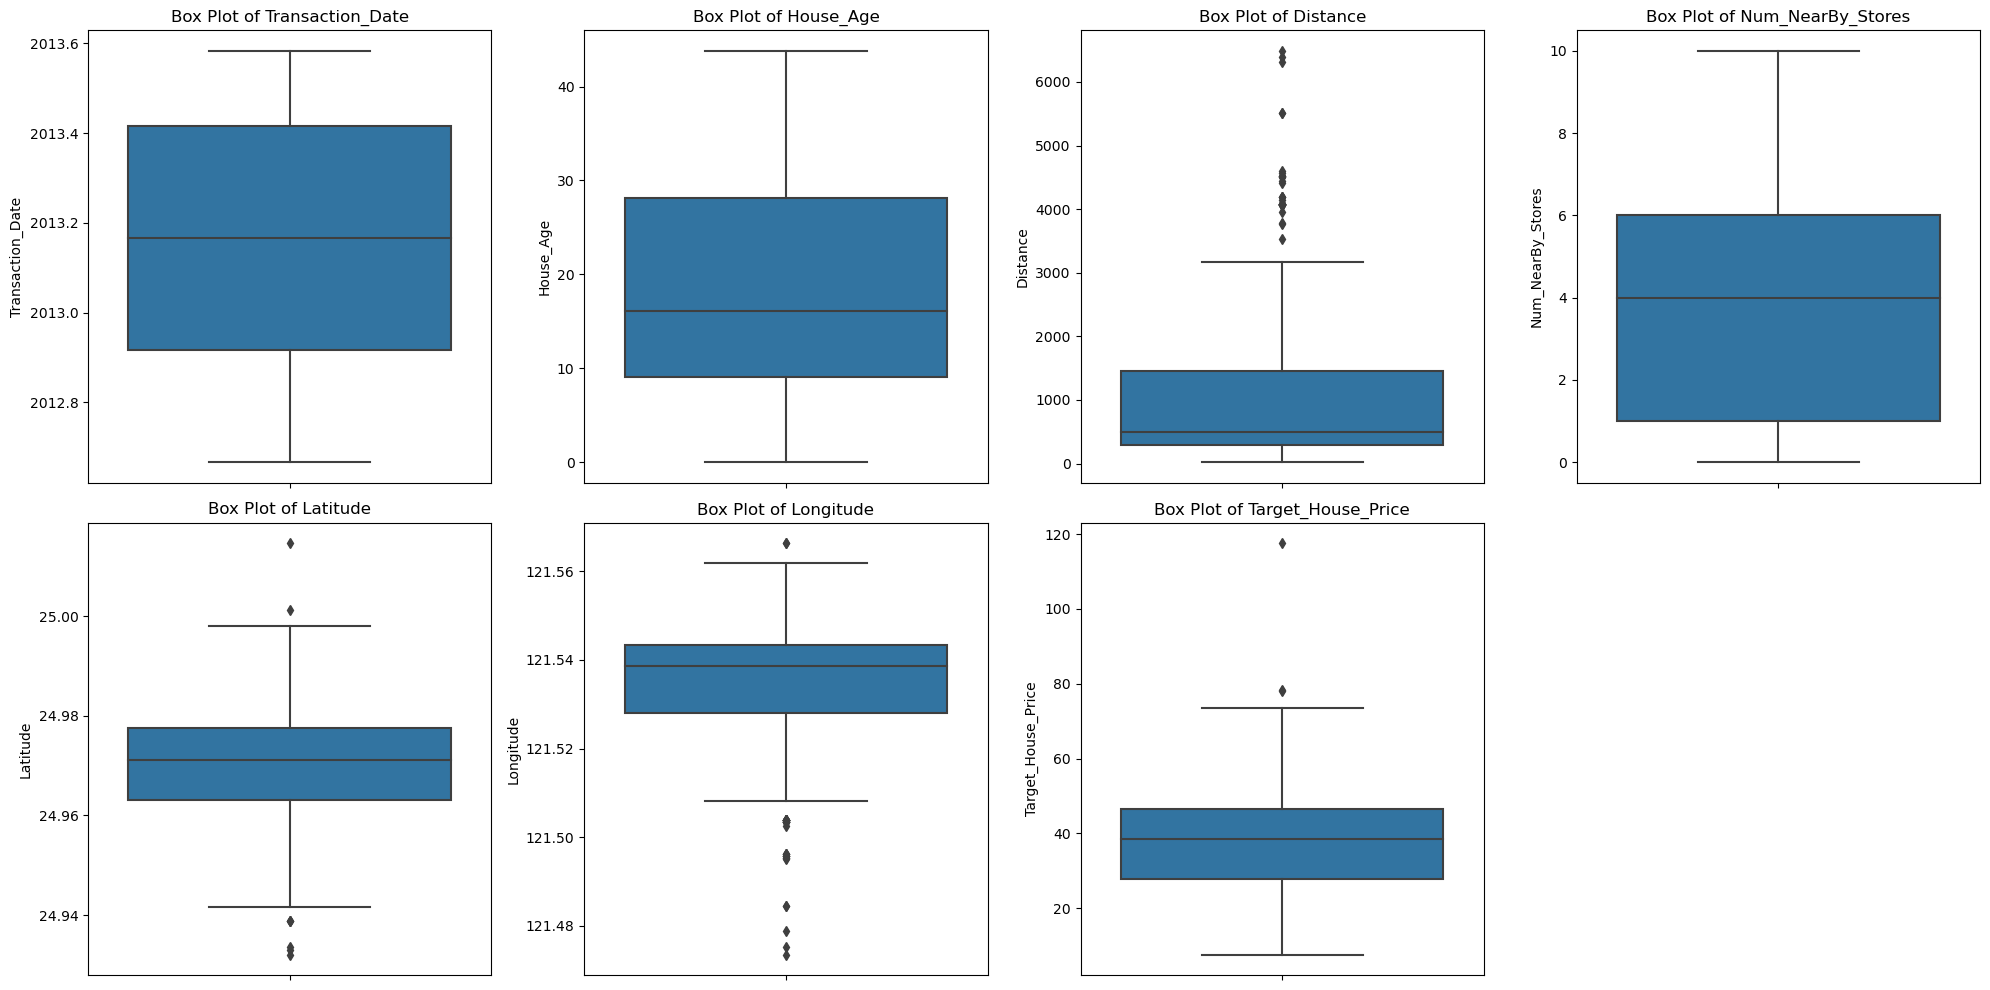

In [26]:
# Draw box plots for continuous variables
plt.figure(figsize=(20, 10))
for i, var in enumerate(data.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=data[var])
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

In [27]:
data.skew()

Transaction_Date     -0.150834
House_Age             0.382926
Distance              1.888757
Num_NearBy_Stores     0.154607
Latitude             -0.438598
Longitude            -1.219591
Target_House_Price    0.599853
dtype: float64

We can clearly see that distance, latitude, longitude and target house price have outliers. Only very few data points in target house price is an outlier. 

We shall perform scaling as the distributions are skewed in almost all variables.

In [28]:
#Scaling using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

In [29]:
# Convert back to DataFrame for ease of use
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)

Split the dataset in train and test set. 
#### Train a linear regression model.

In [31]:
# Separating features and target
X = df_scaled.drop(columns=['Target_House_Price'])
y = df_scaled['Target_House_Price']

In [32]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

In [33]:
# Training Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predicting on test set
y_pred = lin_reg.predict(X_test)

In [35]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

MAE: 0.4816158273175337
MSE: 0.731501612529015
R²: 0.4156526797839425


The Mean Absolute Error and Mean Squared error seem to have lower values, which is good for our analysis.

Let us use leave-one-out validation and five fold cross validation and report the model performance. 

In [95]:
# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
loo_scores = cross_val_score(lin_reg, X, y, cv=loo, scoring='neg_mean_squared_error')
loo_mse = -loo_scores.mean()

In [97]:
# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(lin_reg, X, y, cv=kf, scoring='neg_mean_squared_error')
kf_mse = -kf_scores.mean()

In [101]:
print(f'LOO MSE: {loo_mse}')
print(f'5-Fold MSE: {kf_mse}')

LOO MSE: 0.4325594623871658
5-Fold MSE: 0.4282798500820081


#### Analysis and Comparison:

Mean Absolute Error (MAE): Measures the average magnitude of errors in a set of predictions, without considering their direction. It is useful for understanding the average error in the predictions.[7]

MAE: 0.4816, indicating an average error of this magnitude in the predictions.

Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values. It penalizes larger errors more than MAE and can be sensitive to outliers.[7]

MSE: 0.7315, showing the average squared error; relatively high, indicating some degree of error.

R-squared (R²): Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It indicates how well the model fits the data.[7]

R²: 0.4157, which means that about 41.57% of the variance in the target variable is explained by the model.

#### Cross Validation: [8]

Leave-One-Out (LOO) MSE: 0.4326

5-Fold MSE: 0.4283

Cross-validation provides insights into how well the model generalizes to unseen data, helping to mitigate overfitting or underfitting issues.

When it comes to reliable metric, it would be MSE and k-fold cross validation. This is because, for any data to be well explained by a model, the difference in the actual and predicted values must be lower. Also, when new data is given, the model must predict better.

Thus, in our case, we choose these 2 metrics and leaving out the rest as Leave-One-Out is affected by outliers and if k-fold is set to 10, it becomes LOOCV method. And R square value does not seem to increase for most of the variations made in the datset to handle it for data cleaning and preprocessing. Thus, we do not take R-square for this scenario.

Let us apply L1 and L2 regularization on the linear regression model developed using the same training set. Then compare the performance and indicate key findings.

In [41]:
# L1 and L2 Regularization
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

In [42]:
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge()

In [43]:
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [44]:
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [45]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [46]:
print(f'Lasso MAE: {mae_lasso}, MSE: {mse_lasso}, R²: {r2_lasso}')
print(f'Ridge MAE: {mae_ridge}, MSE: {mse_ridge}, R²: {r2_ridge}')

Lasso MAE: 0.7797443354133097, MSE: 1.253336746597997, R²: -0.0012062265601657796
Ridge MAE: 0.4818299892425895, MSE: 0.7318081967767841, R²: 0.4154077702983914


### Comparing the Evaluation Methods

#### Mean Absolute Error (MAE): Measures the average magnitude of errors in a set of predictions, without considering their direction. It is useful for understanding the average error in the predictions.

MAE: 0.4816 (before regularization)

Lasso MAE: 0.7797 (after L1 regularization)

Ridge MAE: 0.4818 (after L2 regularization)

#### Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values. It penalizes larger errors more than MAE and can be sensitive to outliers.

MSE: 0.7315 (before regularization)

Lasso MSE: 1.2533 (after L1 regularization)

Ridge MSE: 0.7318 (after L2 regularization)


#### R-squared (R²): Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It indicates how well the model fits the data.

R²: 0.4157 (before regularization)

Lasso R²: -0.0012 (after L1 regularization)

Ridge R²: 0.4154 (after L2 regularization)


#### *After Regularization*

Lasso:

MAE: 0.7797, which is significantly higher than the non-regularized model, suggesting worse predictive performance.

MSE: 1.2533, indicating a much higher error compared to before regularization.

R²: -0.0012, which is worse than before regularization, indicating that the model performs worse than a simple mean-based prediction.

Ridge:

MAE: 0.4818, very similar to the MAE before regularization, showing comparable average error.

MSE: 0.7318, almost identical to the MSE before regularization.

R²: 0.4154, very close to the R² before regularization, indicating similar explanatory power.


### Conclusion:

Based on the results, Ridge regularization is preferred over Lasso in this case. It helps in reducing potential overfitting while preserving the model’s performance.

In summary, Ridge regularization maintains performance and might be more suitable for this model. 

And R square is a good metric for telling how well the model fits the data.

### REFERENCES:

[1] I.-C. Yeh, "Real Estate Valuation Data Set," Department of Civil Engineering, Tamkang University, [Online]. Available: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set. [Accessed: Jul. 28, 2024]. License: Creative Commons Attribution 4.0 International (CC BY 4.0).

[2] "Pandas Documentation," Pandas, [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/. [Accessed: Jul. 28, 2024].

[3] "NumPy Documentation," NumPy, [Online]. Available: https://numpy.org/doc/stable/. [Accessed: Jul. 28, 2024].

[4] "Matplotlib Documentation," Matplotlib, [Online]. Available: https://matplotlib.org/stable/contents.html. [Accessed: Jul. 28, 2024].

[5] "Seaborn Documentation," Seaborn, [Online]. Available: https://seaborn.pydata.org/. [Accessed: Jul. 28, 2024].

[6] "Scikit-learn Documentation," Scikit-learn, [Online]. Available: https://scikit-learn.org/stable/user_guide.html. [Accessed: Jul. 28, 2024].

[7] R. Aggarwal, "Know the Best Evaluation Metrics for Your Regression Model," Analytics Vidhya, June 11, 2024. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/. [Accessed: Jul. 28, 2024].

[8] J. Brownlee, "LOOCV for Evaluating Machine Learning Algorithms," Machine Learning Mastery, Aug. 26, 2020. [Online]. Available: https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/. [Accessed: Jul. 28, 2024].

<center> END <center>